In [1]:
# import packages
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import math
import csv

print("Modules loaded")

Modules loaded


In [2]:
flightDf = pd.read_csv("./input/flight-reg-1.0.0.csv", low_memory=False, encoding="latin-1")

print(flightDf.head())

   id  FlightPathId  Rcvr  HasSig    Icao    Bad                FSeen  CMsgs  \
0   2      11352471   102   False  AD3997  False  2020-08-05 07:00:30      1   
1   3      11021170   102   False  A82B72  False  2020-08-05 07:00:29      1   
2   4      10796473   102   False  A4BDB9  False  2020-08-05 07:00:26      2   
3   5      10798030   102   False  A4C3CE  False  2020-08-05 07:00:26      3   
4   6      10669660   102   False  A2CE5C  False  2020-08-05 07:00:22      4   

       Alt     GAlt  ...                                      other_names_1  \
0      NaN      NaN  ...                                                ...   
1   3500.0   3701.0  ...                                                ...   
2  15600.0  15710.0  ...                                                ...   
3    650.0    671.0  ...                                                ...   
4  44975.0  45085.0  ...                                                ...   

                                       other

In [3]:
features = ["Reg", "Long", "Lat", "type_registrant", "Op"]
df1 = flightDf[features]
print(df1.head())

      Reg       Long        Lat  type_registrant  \
0  N951NN -97.047372  32.899326                3   
1  N6252D -84.619019  39.717904                7   
2  N404YX -79.442419  33.516727                3   
3  N406KB -96.833881  32.965118                1   
4  N280DX -77.207108  27.429463                7   

                                                  Op  
0                                  American Airlines  
1  H & H AVIATION ENTERPRISES LLC     - FAIRFIELD...  
2        REPUBLIC AIRLINE INC     - INDIANAPOLIS, IN  
3  PATTERSON JAMES PATTERSON BEVERLY    - CARTWRI...  
4               DSG FINANCE LLC     - CORAOPOLIS, PA  


In [7]:
in_bounds = (df1["Lat"] >= 30) & (df1["Lat"] <= 32) & (df1["Long"] <= -87) & (df1["Long"] >= -89)
b_box = (-87, -89, 30, 32)
df1 = df1[in_bounds]

# latArr = df1["Lat"]
# longArr = df1["Long"]

df1 = df1[df1["type_registrant"] == 5]

# print(latArr)
# print(longArr)
print(df1)
# print(df1.shape())

           Reg       Long        Lat  type_registrant  \
225207   N10UH -87.433852  31.982551                5   
225331   N10UH -87.442987  31.963486                5   
225455   N10UH -87.451337  31.945953                5   
225579   N10UH -87.467926  31.910706                5   
225703   N10UH -87.478694  31.887957                5   
...        ...        ...        ...              ...   
779000  N155SA -87.877754  30.463623                5   
779598  N155SA -87.877754  30.463623                5   
780190  N155SA -87.877754  30.463623                5   
780780  N155SA -87.877754  30.463623                5   
781376  N155SA -87.877754  30.463623                5   

                                                       Op  
225207  UNIVERSITY OF ALABAMA BOARD OF TRUSTEES     - ...  
225331  UNIVERSITY OF ALABAMA BOARD OF TRUSTEES     - ...  
225455  UNIVERSITY OF ALABAMA BOARD OF TRUSTEES     - ...  
225579  UNIVERSITY OF ALABAMA BOARD OF TRUSTEES     - ...  
225703  UNIVERS

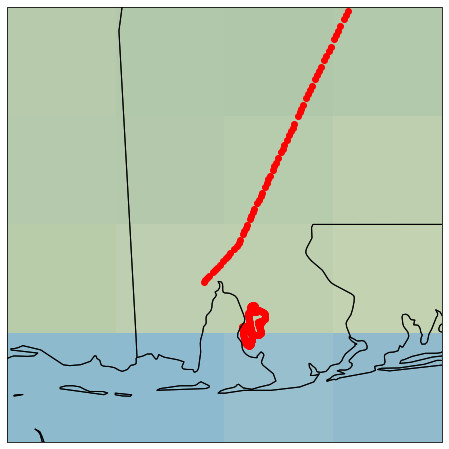

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(b_box, crs=ccrs.PlateCarree())
plt.rcParams["figure.figsize"] = (8,8)
ax.coastlines()
ax.stock_img()

ax.add_feature(cfeature.STATES)
long, lat = df1["Long"], df1["Lat"]
longArr = long.to_numpy()
latArr = lat.to_numpy()

plt.scatter(longArr, latArr, color="red")

plt.show()